# Binning continous variables

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

print('done')

done


In [2]:
df = pd.read_csv("datasets/customer-churn-records.csv")
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


In [3]:
df.shape

(10000, 18)

In [5]:
# Age can be an example of a continous variable 

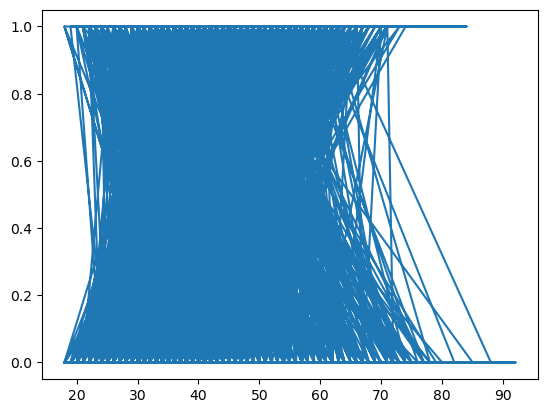

In [10]:
# line chart
plt.plot(df.Age, df.Exited)

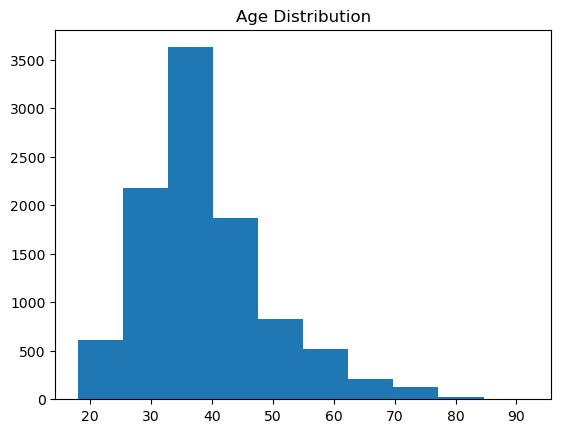

In [11]:
# histogram
plt.hist(df.Age)
plt.title("Age Distribution")
plt.show()

since Age is continous we can't analyze individual values 
we need to group / bin them together

In [13]:
# pd.cut() can be used to create bins
# syntax
# pd.cut(df.column, numOfBins)

In [14]:
A = pd.cut(df.Age, 5)
for i in A.unique():
    print(i)

(32.8, 47.6]
(47.6, 62.4]
(17.926, 32.8]
(62.4, 77.2]
(77.2, 92.0]


- '(' means the value is included in the bin

- ']' means the value is not included in the bin

### create custom bins

In [15]:
print("Youngest: ", df.Age.min())
print("Oldest: ", df.Age.max())

Youngest:  18
Oldest:  92


In [16]:
bins = [15,30,45,60,75,90,105]

In [17]:
B = pd.cut(df.Age, bins)
for i in B.unique():
    print(i)

(30, 45]
(45, 60]
(15, 30]
(60, 75]
(75, 90]
(90, 105]


### Add Labels

In [18]:
# create a new column in the dataset
# Age_group

In [20]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [21]:
df["Age_group"] = pd.cut(df.Age, bins=bins)
# will use the numeric labels

In [23]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age_group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,"(30, 45]"
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,"(30, 45]"


In [24]:
labels = ["teen","youth","adult","middle aged","aged","old"]

In [25]:
df["Age_group"] = pd.cut(df.Age, bins=bins, labels=labels)

In [26]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age_group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,youth
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,youth
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,youth


# Practice

Q1. Draw a bar chart analysing our new column, Age_group vs Exited

Q2. Draw a pie chart for Age_group

In [27]:
# 

<Axes: ylabel='count'>

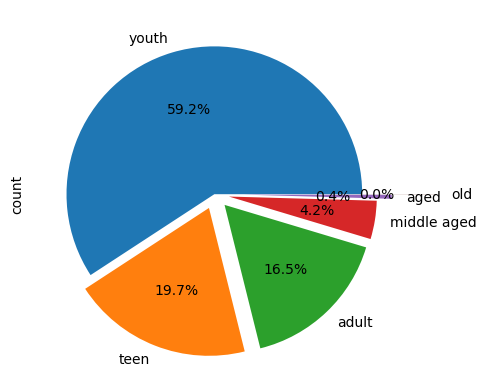

In [41]:
df.Age_group.value_counts().plot(kind="pie", autopct="%1.1f%%",
                                explode=[0,0.1,0.1,0.1,0.2,0.5])

<Axes: xlabel='Age_group', ylabel='Age'>

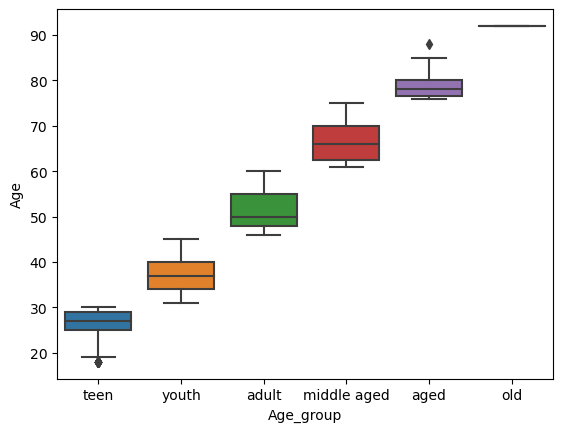

In [42]:
sns.boxplot(data=df, x="Age_group", y="Age")

# Assignment

Q1. Load the titanic dataset from seaborn library

Q2. Group the ages and create age bins and labels

Q3. How many people based on age categories

- survived ?

- did not survive ?

Draw appropriate plots

**Submission: Friday**

# Encoding 

Encoding is simply converting categorical variables into numeric input

Categorical data is non-numeric, grouped in some way

It usually will contain a list of finite values

e.g Marital Status ['Single', 'Married']

For many statistical models, categorical variables are not allowed. Therefore, conversion is necessary be the columns can be used

In [43]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age_group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,youth
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,youth


In [44]:
df.dtypes

RowNumber                int64
CustomerId               int64
Surname                 object
CreditScore              int64
Geography               object
Gender                  object
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Exited                   int64
Complain                 int64
Satisfaction Score       int64
Card Type               object
Point Earned             int64
Age_group             category
dtype: object

In [45]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [46]:
# Manual encoding
map_dict = {
    'France': 1,
    'Spain': 2,
    'Germany': 3
}

This simple mapping above can cause the statistical model to become bais, assuming that there is some order or relationship to the variables

e.g a model could assume that France and Spain are more closely related than France and Germany
which may not be the case

In [47]:
# Age_group category has some encoding attached to it

In [48]:
df.Age_group.cat.codes.unique()

array([1, 2, 0, 3, 4, 5], dtype=int8)

In [50]:
# if -1 is present, it reps null values

## Pandas get dummies method

create a temp dataframe to hold the values we want to classify

In [51]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [52]:
temp = pd.DataFrame(df["Geography"])
temp.tail(3)

,Geography
9997,France
9998,Germany
9999,France


In [54]:
# pd.get_dummies

encoded = pd.get_dummies(temp["Geography"])
encoded.tail(3)

,France,Germany,Spain
9997,True,False,False
9998,False,True,False
9999,True,False,False
